In [1]:
print("Hello Game Analytics")


Hello Game Analytics


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [6]:
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [7]:
df.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

In [8]:
df["version"].value_counts()

,count
version,
gate_40,45489
gate_30,44700


In [10]:
df["version"].value_counts(normalize=True)

,proportion
version,
gate_40,0.504374
gate_30,0.495626


In [11]:
df.groupby("version")["retention_1"].mean()

,retention_1
version,
gate_30,0.448188
gate_40,0.442283


In [12]:
df.groupby("version")["retention_7"].mean()

,retention_7
version,
gate_30,0.190201
gate_40,0.182000


In [13]:
df["sum_gamerounds"].describe()

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


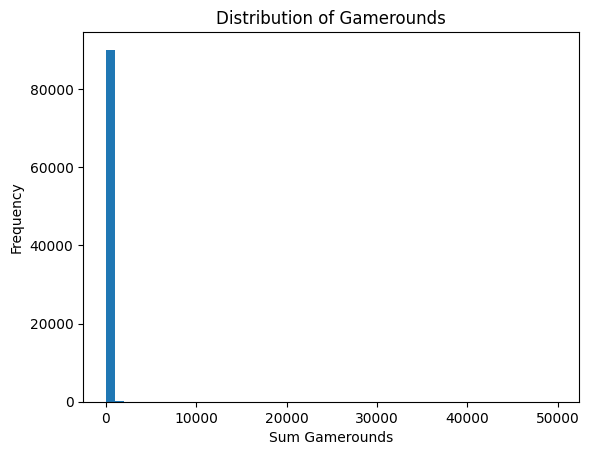

In [14]:
import matplotlib.pyplot as plt

plt.hist(df["sum_gamerounds"], bins=50)
plt.xlabel("Sum Gamerounds")
plt.ylabel("Frequency")
plt.title("Distribution of Gamerounds")
plt.show()

In [15]:
df["sum_gamerounds"].quantile([0.95, 0.99, 0.999])

,sum_gamerounds
0.950,221.000
0.990,493.000
0.999,1073.624


In [16]:
threshold = df["sum_gamerounds"].quantile(0.99)

df_trim = df[df["sum_gamerounds"] <= threshold]

print("Original size:", len(df))
print("Trimmed size:", len(df_trim))

Original size: 90189
Trimmed size: 89291


In [17]:
df.groupby("version")["retention_7"].mean()

,retention_7
version,
gate_30,0.190201
gate_40,0.182000


In [18]:
df_trim.groupby("version")["retention_7"].mean()

,retention_7
version,
gate_30,0.182537
gate_40,0.174190


In [19]:
from statsmodels.stats.proportion import proportions_ztest

# Full dataset
ret_30 = df[df["version"]=="gate_30"]["retention_7"].sum()
n_30 = len(df[df["version"]=="gate_30"])

ret_40 = df[df["version"]=="gate_40"]["retention_7"].sum()
n_40 = len(df[df["version"]=="gate_40"])

count = [ret_30, ret_40]
nobs = [n_30, n_40]

z_stat, p_value = proportions_ztest(count, nobs)

print("Z-stat:", z_stat)
print("P-value:", p_value)

Z-stat: 3.164358912748191
P-value: 0.001554249975614329


In [20]:
import numpy as np

p1 = ret_30 / n_30
p2 = ret_40 / n_40

absolute_lift = p1 - p2
relative_lift = (p1 - p2) / p2

print("Absolute Lift:", absolute_lift)
print("Relative Lift:", relative_lift)

Absolute Lift: 0.008201298315205913
Relative Lift: 0.04506206776910276


In [21]:
from statsmodels.stats.proportion import confint_proportions_2indep

ci_low, ci_high = confint_proportions_2indep(
    ret_30, n_30,
    ret_40, n_40,
    method='wald'
)

print("95% Confidence Interval:")
print("Lower bound:", ci_low)
print("Upper bound:", ci_high)

95% Confidence Interval:
Lower bound: 0.00312104421152628
Upper bound: 0.013281552418885546


In [22]:
def segment_user(x):
    if x <= 15:
        return "low"
    elif x <= 100:
        return "mid"
    else:
        return "high"

df["segment"] = df["sum_gamerounds"].apply(segment_user)

df.groupby(["segment", "version"])["retention_7"].mean()

segment  version
high     gate_30    0.713864
         gate_40    0.712401
low      gate_30    0.024267
         gate_40    0.023674
mid      gate_30    0.212297
         gate_40    0.193116
Name: retention_7, dtype: float64

In [23]:
from statsmodels.stats.proportion import proportions_ztest

mid_30 = df[(df["segment"]=="mid") & (df["version"]=="gate_30")]["retention_7"].sum()
n_mid_30 = len(df[(df["segment"]=="mid") & (df["version"]=="gate_30")])

mid_40 = df[(df["segment"]=="mid") & (df["version"]=="gate_40")]["retention_7"].sum()
n_mid_40 = len(df[(df["segment"]=="mid") & (df["version"]=="gate_40")])

count = [mid_30, mid_40]
nobs = [n_mid_30, n_mid_40]

z_stat, p_value = proportions_ztest(count, nobs)

print("Mid Segment Z-stat:", z_stat)
print("Mid Segment P-value:", p_value)

Mid Segment Z-stat: 4.400422113603696
Mid Segment P-value: 1.0804050245735199e-05


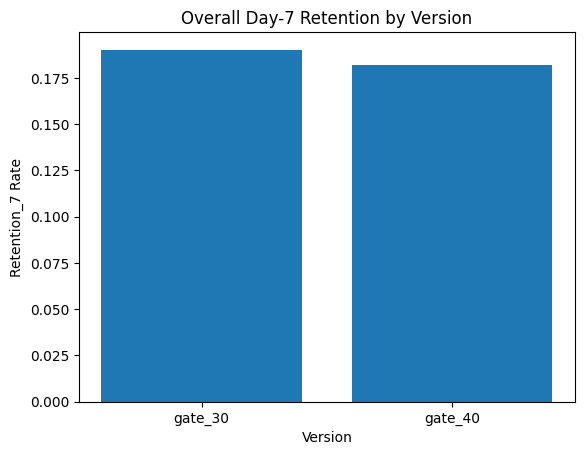

In [24]:
import matplotlib.pyplot as plt

overall = df.groupby("version")["retention_7"].mean()

plt.figure()
plt.bar(overall.index, overall.values)
plt.xlabel("Version")
plt.ylabel("Retention_7 Rate")
plt.title("Overall Day-7 Retention by Version")
plt.show()

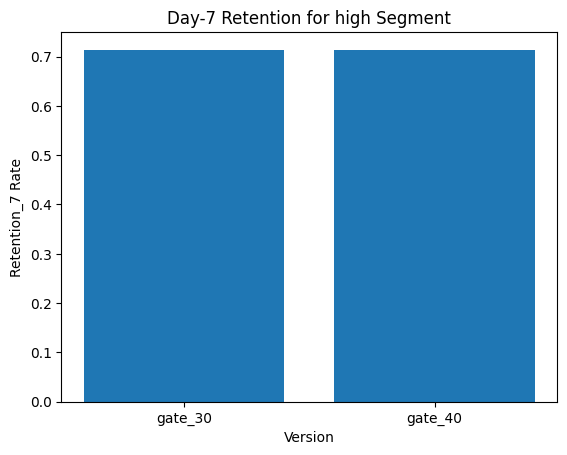

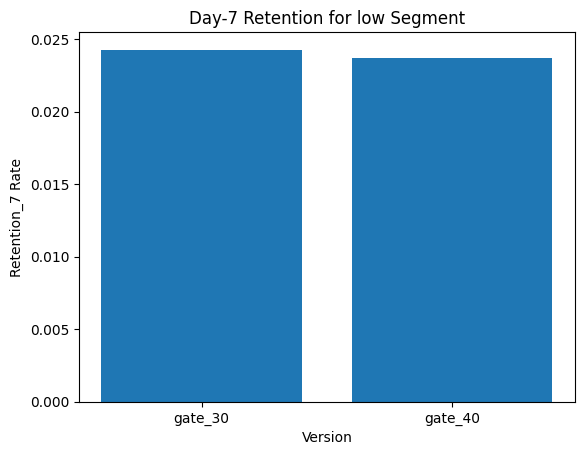

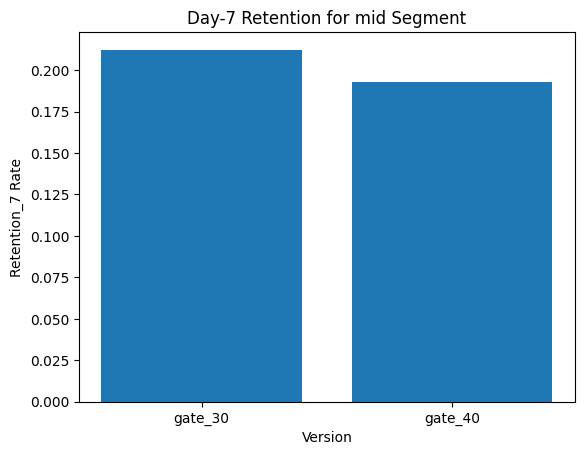

In [25]:
segment_ret = df.groupby(["segment", "version"])["retention_7"].mean().unstack()

for seg in segment_ret.index:
    plt.figure()
    plt.bar(segment_ret.columns, segment_ret.loc[seg])
    plt.xlabel("Version")
    plt.ylabel("Retention_7 Rate")
    plt.title(f"Day-7 Retention for {seg} Segment")
    plt.show()

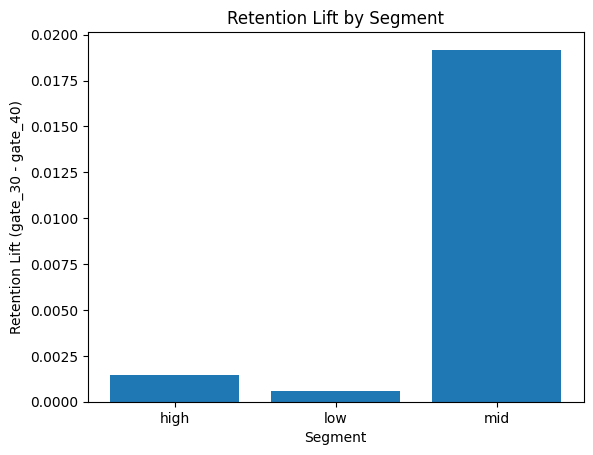

In [26]:
lift = segment_ret["gate_30"] - segment_ret["gate_40"]

plt.figure()
plt.bar(lift.index, lift.values)
plt.xlabel("Segment")
plt.ylabel("Retention Lift (gate_30 - gate_40)")
plt.title("Retention Lift by Segment")
plt.show()